# Importing Libraries

In [1]:
# %matplotlib inline  Not needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Datasets

**Importing data into Python**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving imdb_dataset.csv to imdb_dataset (6).csv


In [3]:
df = pd.read_csv('imdb_dataset.csv')


# Getting To Know Dataset

In [4]:
df.shape

(1000, 12)

In [5]:
#df.head()

In [6]:
df.dtypes

Poster Link      object
Title            object
Release Year     object
Certificate      object
Runtime          object
Genre            object
Votes            object
Rating          float64
Description      object
metascore       float64
Director         object
Gross            object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Poster Link   1000 non-null   object 
 1   Title         1000 non-null   object 
 2   Release Year  1000 non-null   object 
 3   Certificate   987 non-null    object 
 4   Runtime       1000 non-null   object 
 5   Genre         1000 non-null   object 
 6   Votes         1000 non-null   object 
 7   Rating        1000 non-null   float64
 8   Description   1000 non-null   object 
 9   metascore     839 non-null    float64
 10  Director      1000 non-null   object 
 11  Gross         847 non-null    object 
dtypes: float64(2), object(10)
memory usage: 93.9+ KB


In [8]:
df.describe()

,Rating,metascore
count,1000.000000,839.000000
mean,7.964500,78.771156
std,0.277429,12.011533
min,7.600000,28.000000
25%,7.700000,71.000000
50%,7.900000,80.000000
75%,8.100000,88.000000
max,9.300000,100.000000


In [9]:
#df.describe(include = 'all')

# Data Wrangling 

**Dealing With Missing Values**

In [10]:
# to find the sum of null values in the dataset
df.isnull().sum().sort_values(ascending = False)

metascore       161
Gross           153
Certificate      13
Poster Link       0
Title             0
Release Year      0
Runtime           0
Genre             0
Votes             0
Rating            0
Description       0
Director          0
dtype: int64

In [11]:
df['Certificate'].value_counts()

R            364
Not Rated    176
PG-13        167
PG           143
Passed        48
G             39
Approved      29
TV-MA          7
TV-PG          4
TV-14          3
GP             3
NC-17          2
M/PG           1
Unrated        1
Name: Certificate, dtype: int64

In [12]:
df.loc[df['Certificate'] == 'TV-MA', 'Certificate'] = 'R'
df.loc[df['Certificate'] == 'Not Rated', 'Certificate'] = 'Unrated'
df.loc[df['Certificate'].isna(), 'Certificate'] = 'Unrated'
df.loc[df['Certificate'] == 'TV-14', 'Certificate'] = 'PG-13'
df.loc[df['Certificate'] == 'TV-PG', 'Certificate'] = 'PG'
df.loc[df['Certificate'] == 'GP', 'Certificate'] = 'PG'
df.loc[df['Certificate'] == 'Approved', 'Certificate'] = 'Passed'
df.loc[df['Certificate'] == 'NC-17', 'Certificate'] = 'R'
df.loc[df['Certificate'] == 'M/PG', 'Certificate'] = 'R'

In [13]:
df['Certificate'].value_counts()

R          374
Unrated    190
PG-13      170
PG         150
Passed      77
G           39
Name: Certificate, dtype: int64

In [14]:
df['metascore'] = df['metascore'].fillna(df['metascore'].median())
df['Gross'] = df['Gross'].fillna(df['Gross'].mode()[0])

In [15]:
df.isnull().sum()

Poster Link     0
Title           0
Release Year    0
Certificate     0
Runtime         0
Genre           0
Votes           0
Rating          0
Description     0
metascore       0
Director        0
Gross           0
dtype: int64

In [16]:
df['Votes'] = df['Votes'].str.replace(',','')
df['Gross'] = df['Gross'].str.replace('$','')
df['Gross'] = df['Gross'].str.replace('M','')
df['Gross'] = df['Gross'].str.replace('#','')
df['Votes'] = df['Votes'].astype('int64')
df['Gross'] = df['Gross'].astype('float64')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [17]:
df.head()

,Poster Link,Title,Release Year,Certificate,Runtime,Genre,Votes,Rating,Description,metascore,Director,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,R,142 min,Drama,2636372,9.3,Two imprisoned men bond over a number of years...,81.0,Frank Darabont,28.34
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,R,175 min,"Crime, Drama",1827221,9.2,The aging patriarch of an organized crime dyna...,100.0,Francis Ford Coppola,134.97
2,https://m.media-amazon.com/images/M/MV5BNTk2Mj...,Rocketry: The Nambi Effect,2022,Unrated,157 min,"Biography, Drama",42592,9.0,Based on the life of Indian Space Research Org...,80.0,X,0.01
3,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,PG-13,152 min,"Action, Crime, Drama",2607612,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,534.86
4,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,PG-13,201 min,"Action, Adventure, Drama",1810588,9.0,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,377.85


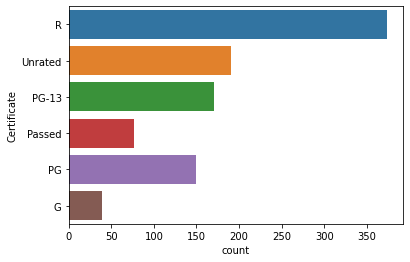

In [18]:
sns.countplot(y='Certificate', data=df)
plt.show()

In [19]:
top_voted = df.sort_values(['Votes'],ascending = False)
top_voted[['Title','Votes']][:7]

,Title,Votes
0,The Shawshank Redemption,2636372
3,The Dark Knight,2607612
10,Inception,2311783
12,Fight Club,2079975
14,Forrest Gump,2040748
9,Pulp Fiction,2017650
17,The Matrix,1886737


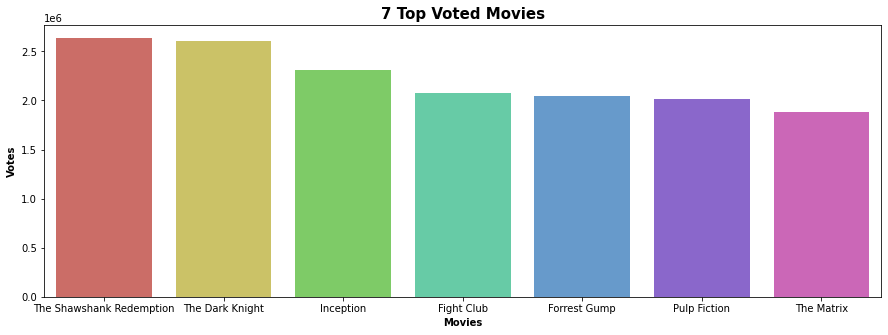

In [20]:
fig = plt.figure(figsize=(15, 5))
sns.barplot(x=top_voted['Title'][:7], y=top_voted['Votes'][:7], palette = 'hls')
plt.title('7 Top Voted Movies', fontweight = 'bold', fontsize = 15)
plt.xlabel('Movies', fontsize = 10, fontweight = 'bold')
plt.ylabel('Votes', fontsize = 10, fontweight = 'bold')
plt.show()

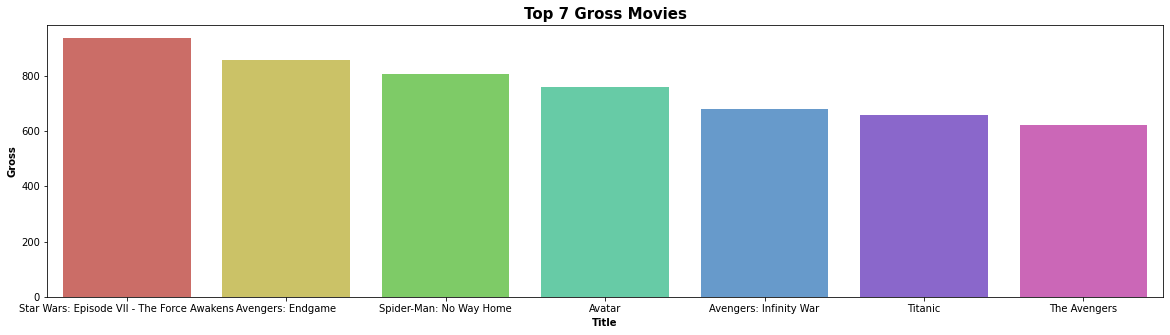

In [21]:
plt.figure(figsize=(20, 5))
top_gross = df.sort_values(['Gross'], ascending = False)
plt.title('Top 7 Gross Movies', fontsize = 15, fontweight = 'bold')
plt.xlabel('Movies', fontsize = 10, fontweight = 'bold')
plt.ylabel ('Gross', fontsize = 10, fontweight = 'bold')
sns.barplot(x=top_gross['Title'][:7], y=top_gross['Gross'][:7], palette = 'hls')